/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.9569 - val_loss: 3.6920
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1940 - val_loss: 1.4042
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0989 - val_loss: 0.7213
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0873 - val_loss: 0.9051
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0883 - val_loss: 0.8622
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0918 - val_loss: 0.9364
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0770 - val_loss: 0.8484
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0841 - val_loss: 0.7919
Epoch 9/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0871 - val_loss: 0.6663
Epoch 10/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0671 - val_loss: 0.6333
Epoch 11/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0853 - val_loss: 0.5926
Epoch 12/1000
125/12

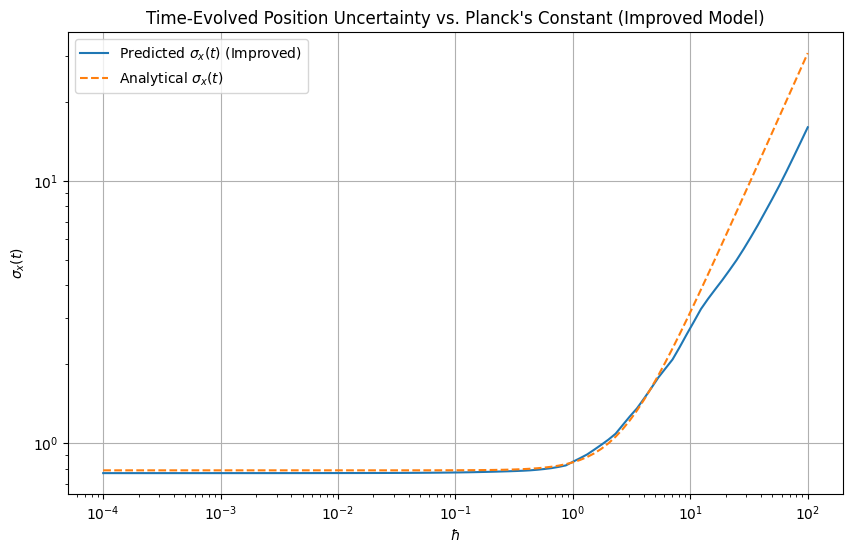

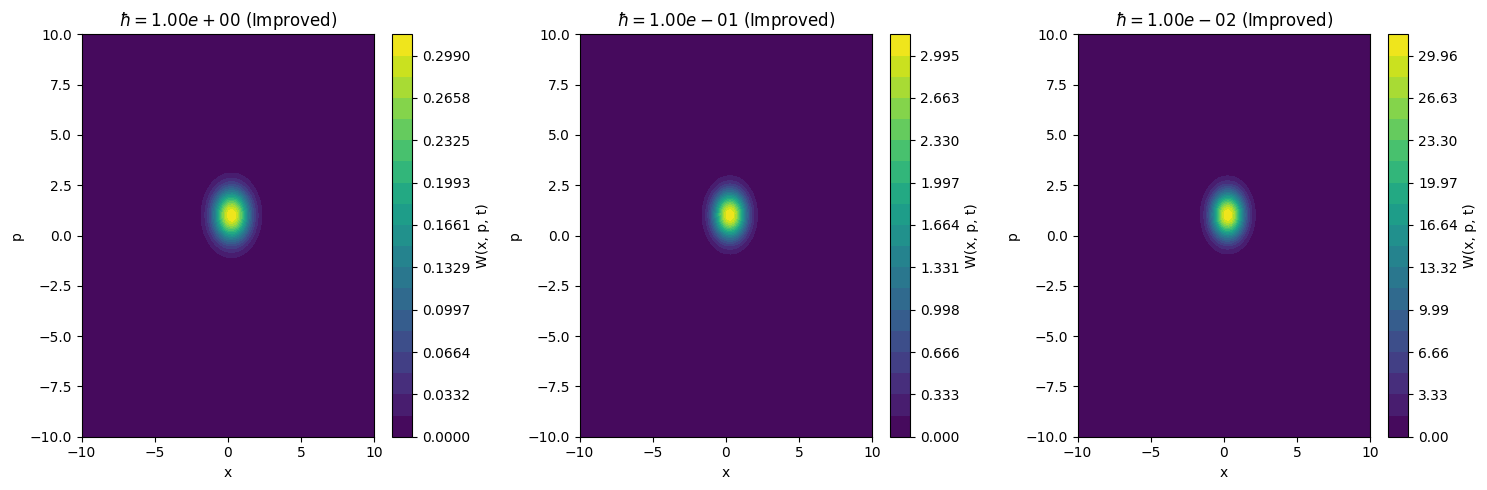

Plots generated as 'sigma_vs_hbar_improved.png' and 'phase_space_convergence_improved.png'


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
m = 1.0
omega = 1.0
time = 5.0
num_samples = 10000
hbar_values_train = np.logspace(-3, 1, 50) # Range of hbar values for training
hbar_values_plot = np.logspace(-4, 2, 100) # Range of hbar values for plotting

training_data = []
training_labels = []

for hbar in hbar_values_train:
    for _ in range(num_samples // len(hbar_values_train)):
        initial_x = np.random.uniform(-5, 5)
        initial_p = np.random.uniform(-5, 5)
        initial_sigma_x = np.random.uniform(0.5, 2.0)
        initial_state = [initial_x, initial_p, initial_sigma_x, hbar]

        sigma_p0 = hbar / (2 * initial_sigma_x)
        xt = initial_x * np.cos(omega * time) + (initial_p / (m * omega)) * np.sin(omega * time)
        pt = initial_p * np.cos(omega * time) - (m * omega * initial_x) * np.sin(omega * time)
        sigmat_x_sq = initial_sigma_x**2 * np.cos(omega * time)**2 + (sigma_p0**2 / (m**2 * omega**2)) * np.sin(omega * time)**2 + (hbar / (2 * m * omega)) * np.sin(2 * omega * time) * ((sigma_p0 / (m * omega * initial_sigma_x)) - (m * omega * initial_sigma_x / sigma_p0))
        sigmat_p_sq = (m * omega * np.sqrt(np.abs(sigmat_x_sq)))**2 # Corrected sigma_p calculation

        target = [xt, pt, np.sqrt(np.abs(sigmat_x_sq)), np.sqrt(np.abs(sigmat_p_sq))]

        training_data.append(initial_state)
        training_labels.append(target)

training_data = np.array(training_data, dtype=np.float32)
training_labels = np.array(training_labels, dtype=np.float32)

# Deep Neural Network Architecture and Training
model_improved = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4) # Output: xt, pt, sigmat_x, sigmat_p
])

optimizer_improved = tf.keras.optimizers.Adam(learning_rate=0.0005)
loss_fn_improved = tf.keras.losses.MeanSquaredError()

model_improved.compile(optimizer=optimizer_improved, loss=loss_fn_improved)

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
epochs_improved = 1000
batch_size_improved = 64
history_improved = model_improved.fit(
    training_data, training_labels,
    epochs=epochs_improved,
    batch_size=batch_size_improved,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

loss_improved = model_improved.evaluate(training_data, training_labels, verbose=0)
print(f"Final Loss (Improved Model): {loss_improved:.4f}")

# --- Generate Plots ---

# Plot 1: sigma_x(t) vs hbar (Improved Model)
initial_x_plot = 1.0
initial_p_plot = 0.0
initial_sigma_x_plot = 1.0

predicted_sigma_x_t_improved = []
analytical_sigma_x_t = []

for hbar_plot in hbar_values_plot:
    input_plot = np.array([[initial_x_plot, initial_p_plot, initial_sigma_x_plot, hbar_plot]], dtype=np.float32)
    prediction_improved = model_improved.predict(input_plot, verbose=0)[0]
    predicted_sigma_x_t_improved.append(prediction_improved[2])

    sigma_p0_analytical = hbar_plot / (2 * initial_sigma_x_plot)
    sigmat_x_sq_analytical = initial_sigma_x_plot**2 * np.cos(omega * time)**2 + (sigma_p0_analytical**2 / (m**2 * omega**2)) * np.sin(omega * time)**2 + (hbar_plot / (2 * m * omega)) * np.sin(2 * omega * time) * ((sigma_p0_analytical / (m * omega * initial_sigma_x_plot)) - (m * omega * initial_sigma_x_plot / sigma_p0_analytical))
    analytical_sigma_x_t.append(np.sqrt(np.abs(sigmat_x_sq_analytical)))

plt.figure(figsize=(10, 6))
plt.loglog(hbar_values_plot, predicted_sigma_x_t_improved, label='Predicted $\sigma_x(t)$ (Improved)')
plt.loglog(hbar_values_plot, analytical_sigma_x_t, linestyle='--', label='Analytical $\sigma_x(t)$')
plt.xlabel('$\hbar$')
plt.ylabel('$\sigma_x(t)$')
plt.title('Time-Evolved Position Uncertainty vs. Planck\'s Constant (Improved Model)')
plt.legend()
plt.grid(True)
plt.savefig('sigma_vs_hbar_improved.png')
plt.show()

# Plot 2: Phase Space Evolution
num_points = 100
x_range = np.linspace(-10, 10, num_points)
p_range = np.linspace(-10, 10, num_points)
X, P = np.meshgrid(x_range, p_range)

hbar_plot_values = [1.0, 0.1, 0.01] # Example hbar values for the plot
plt.figure(figsize=(15, 5))

for i, hbar_plot in enumerate(hbar_plot_values):
    input_plot = np.array([[initial_x_plot, initial_p_plot, initial_sigma_x_plot, hbar_plot]], dtype=np.float32)
    prediction_improved = model_improved.predict(input_plot, verbose=0)[0]
    xt_pred_improved, pt_pred_improved, sigmat_x_pred_improved, sigmat_p_pred_improved = prediction_improved

    W_predicted_improved = 1 / (np.pi * hbar_plot) * np.exp(-((X - xt_pred_improved)**2 / (2 * sigmat_x_pred_improved**2)) - ((P - pt_pred_improved)**2 / (2 * sigmat_p_pred_improved**2)))

    plt.subplot(1, len(hbar_plot_values), i + 1)
    contour_improved = plt.contourf(X, P, W_predicted_improved, levels=np.linspace(W_predicted_improved.min(), W_predicted_improved.max(), 20), cmap='viridis')
    plt.xlabel('x')
    plt.ylabel('p')
    plt.title(f'$\hbar = {hbar_plot:.2e}$ (Improved)')
    plt.colorbar(contour_improved, label='W(x, p, t)')

plt.tight_layout()
plt.savefig('phase_space_convergence_improved.png')
plt.show()

print("Plots generated as 'sigma_vs_hbar_improved.png' and 'phase_space_convergence_improved.png'")